In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import dump
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fish_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [4]:
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [5]:
df.nunique()

species         9
length       1857
weight        249
w_l_ratio      57
dtype: int64

In [6]:
x = df.iloc[:, [1,2,3]].values 
y = df.iloc[:, [0]].values  
y = y.reshape(len(y),) 

In [7]:
x

array([[10.66,  3.45,  0.32],
       [ 6.91,  3.27,  0.47],
       [ 8.38,  3.46,  0.41],
       ...,
       [32.81,  6.25,  0.19],
       [29.78,  6.11,  0.21],
       [31.62,  6.14,  0.19]])

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [9]:
# Split data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
# Inisialisasi model Random Forest dengan parameter tertentu
rf_model = RandomForestClassifier(
    n_estimators=200,  # Jumlah pohon
    criterion='entropy',  # Kriteria split
    max_depth=10,  # Kedalaman maksimum pohonS
    min_samples_split=5,  # Jumlah minimum sampel untuk memisahkan node
    min_samples_leaf=2,  # Jumlah minimum sampel di leaf node
    random_state=42  # Seed untuk reproduktibilitas
)

In [11]:
# Latih model
rf_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=42)

In [12]:
# Prediksi pada data uji
y_pred = rf_model.predict(x_test)

In [13]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model Random Forest: {accuracy}")
print(f"Laporan Klasifikasi:\n{classification_report(y_test, y_pred)}")

Akurasi Model Random Forest: 0.9387254901960784
Laporan Klasifikasi:
                        precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00        97
     Coilia dussumieri       1.00      1.00      1.00        96
Otolithoides biauritus       0.71      0.85      0.77       100
     Otolithoides pama       1.00      1.00      1.00        85
     Pethia conchonius       1.00      1.00      1.00        84
  Polynemus paradiseus       1.00      1.00      1.00        85
  Puntius lateristriga       1.00      1.00      1.00        74
        Setipinna taty       0.82      0.66      0.73       103
 Sillaginopsis panijus       1.00      1.00      1.00        92

              accuracy                           0.94       816
             macro avg       0.95      0.95      0.94       816
          weighted avg       0.94      0.94      0.94       816



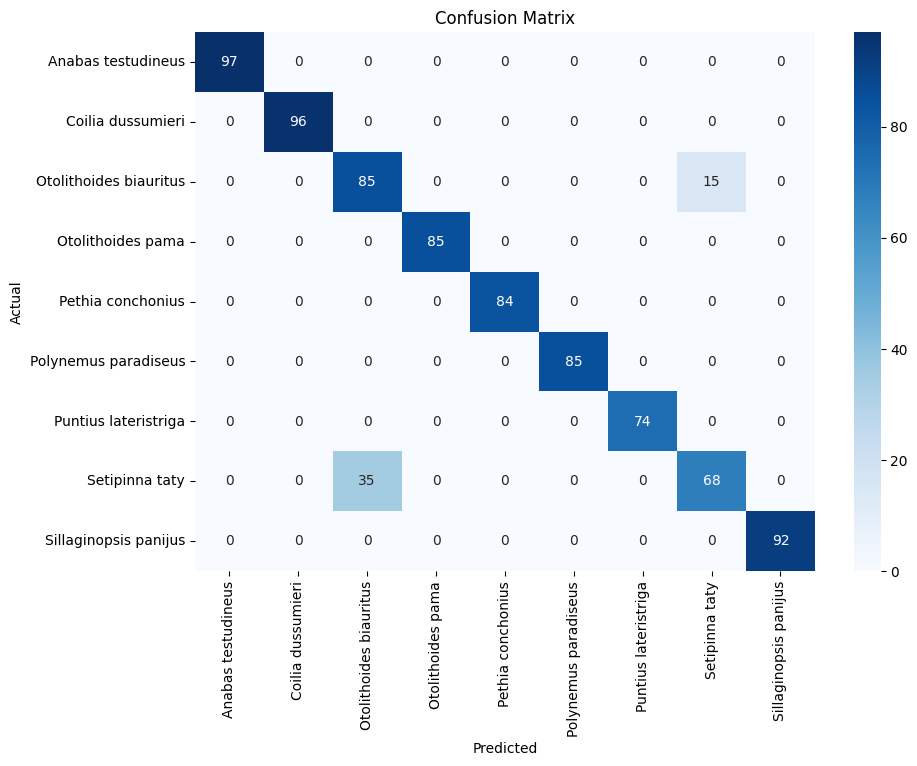

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

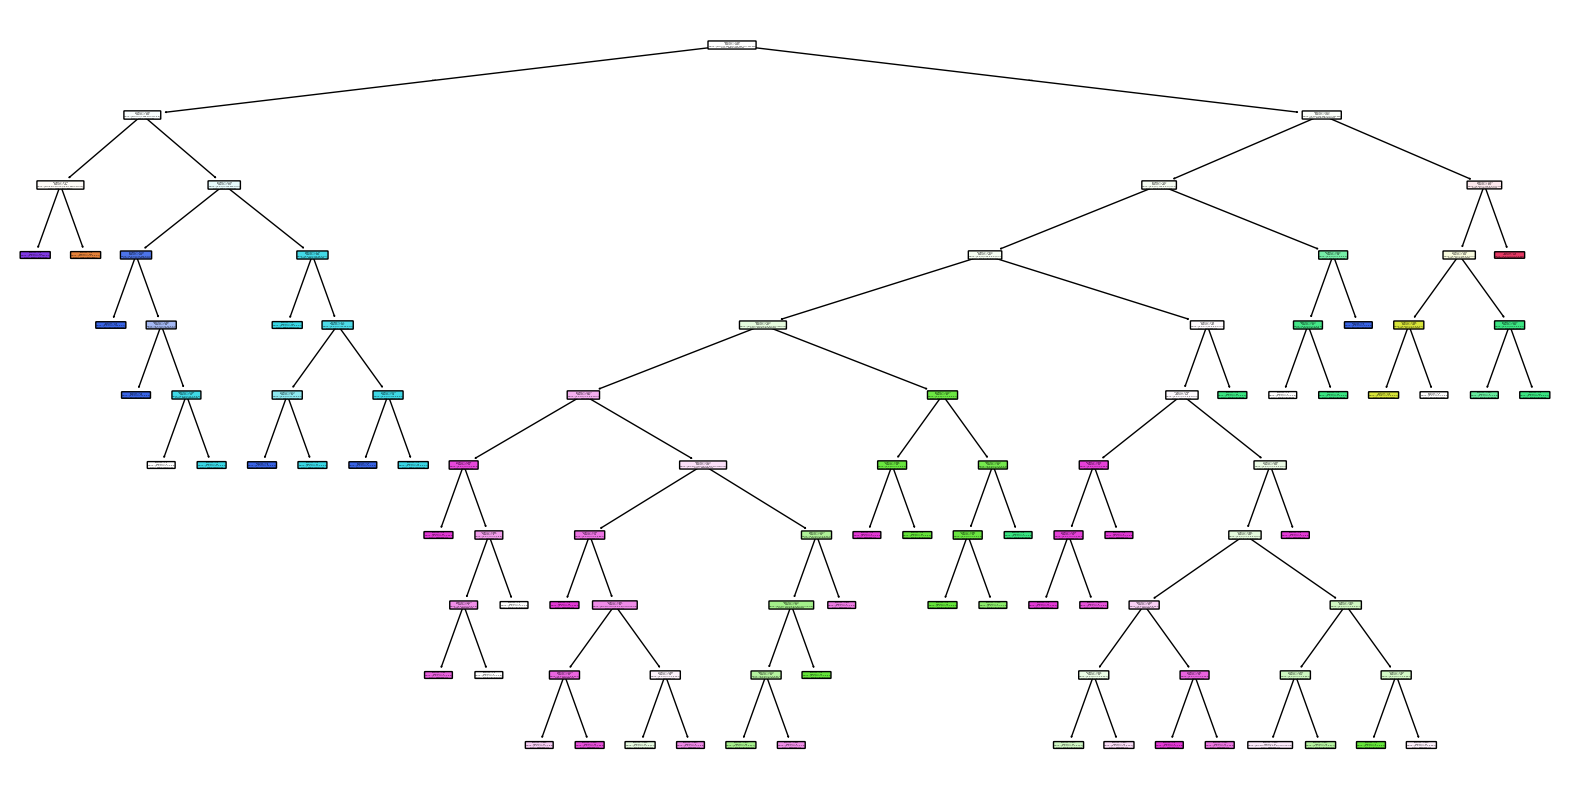

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualisasikan pohon keputusan
plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[0],  # Ambil pohon pertama dari Random Forest
          filled=True,  # Mewarnai node dengan kelas yang diprediksi
          feature_names=df.columns,  # Nama fitur (misalnya df.columns)
          class_names=[
              'Anabas testudineus', 'Coilia dussumieri', 'Otolithoides biauritus', 'Otolithoides pama',
              'Pethia conchonius', 'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
              'Sillaginopsis panijus'
          ],  # Nama kelas target (nama spesies ikan)
          rounded=True)  # Membuat sudut node membulat
plt.show()

In [16]:
# Data baru
new_data = [[23.78,2.71,0.11]]

# Scaling data baru
scaled_new_data = scaler.transform(new_data)

# Prediksi
y_pred_new = rf_model.predict(scaled_new_data)

print("Spesies Baru : ", y_pred_new)

Spesies Baru :  ['Coilia dussumieri']


In [17]:
import joblib

# Menyimpan model SVM
joblib.dump(rf_model, 'Random_Scaler_Model.pkl')

# Menyimpan scaler
joblib.dump(scaler, 'Random_Scaler.pkl')

['Random_Scaler.pkl']